# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\\Study Work\\Data Science\\Data Science Projects\\Income\\data\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

## Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Missing Values

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**There are no missing values in the dataset**

### Checks for '?' in dataset

In [8]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

### Duplicates

In [6]:
df.duplicated().sum()

24

In [7]:
## Drop the duplicates
df = df.drop_duplicates()

### Data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### Unique values in each column

In [10]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

### Statistics of the data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


### Exploring the data

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
print("Categories in 'workclass' variable:     ",end=" " )
print(df['workclass'].unique())

print("Categories in 'education' variable:  ",end=" ")
print(df['education'].unique())

print("Categories in'marital status' variable:",end=" " )
print(df['marital.status'].unique())

print("Categories in 'occupation' variable:     ",end=" " )
print(df['occupation'].unique())

print("Categories in 'relationship' variable:     ",end=" " )
print(df['relationship'].unique())

print("Categories in 'race' variable:     ",end=" " )
print(df['race'].unique())

print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'country' variable:     ",end=" " )
print(df['native.country'].unique())

Categories in 'workclass' variable:      ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Categories in 'education' variable:   ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Categories in'marital status' variable: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Categories in 'occupation' variable:      ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Categories in 'relationship' variable:      ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Categories in 'race' variable:      ['White' 'Black' 'Asian-Pac-Islander

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

We have 9 categorical features : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [17]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


# Exploratory Data Analysis

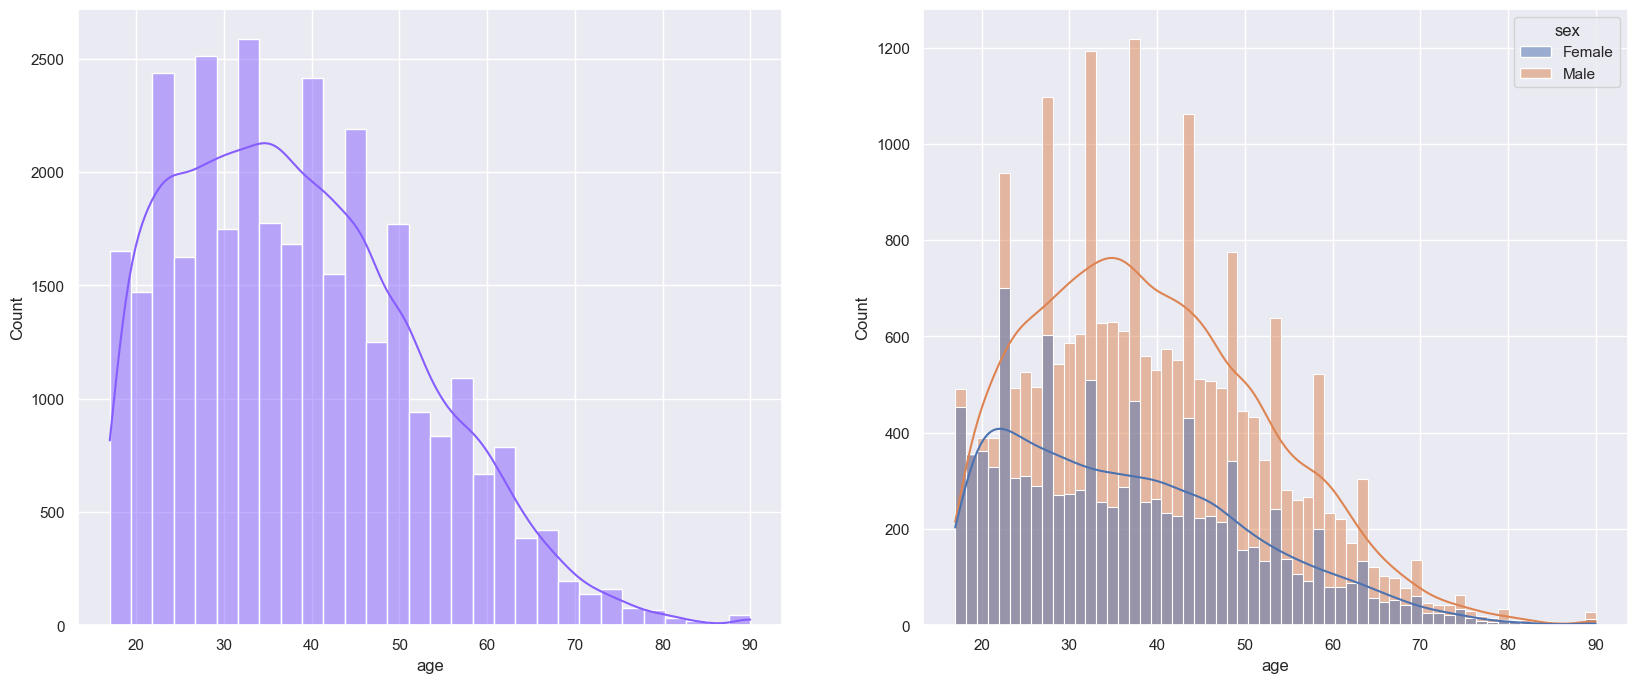

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df, x='age', bins=30, kde=True, color='#865DFF')
plt.subplot(122)
sns.histplot(data=df, x='age', kde=True, hue='sex')
plt.show()

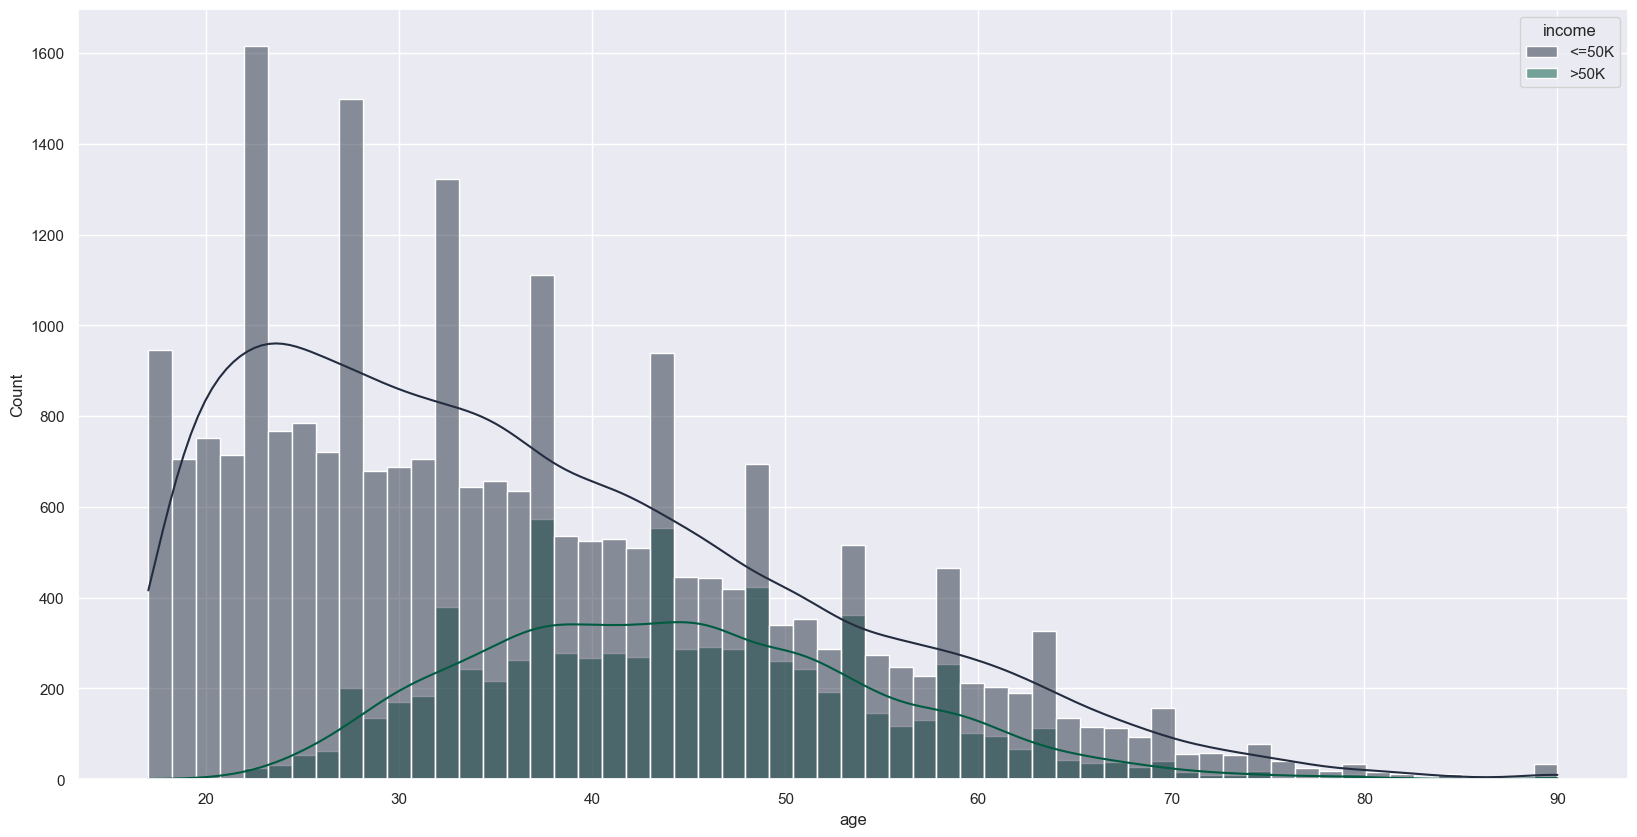

In [20]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='age', kde=True, hue='income', palette={"<=50K": "#232D3F", ">50K": "#005B41"})
plt.show()

**Insight: Age feature is skewed**

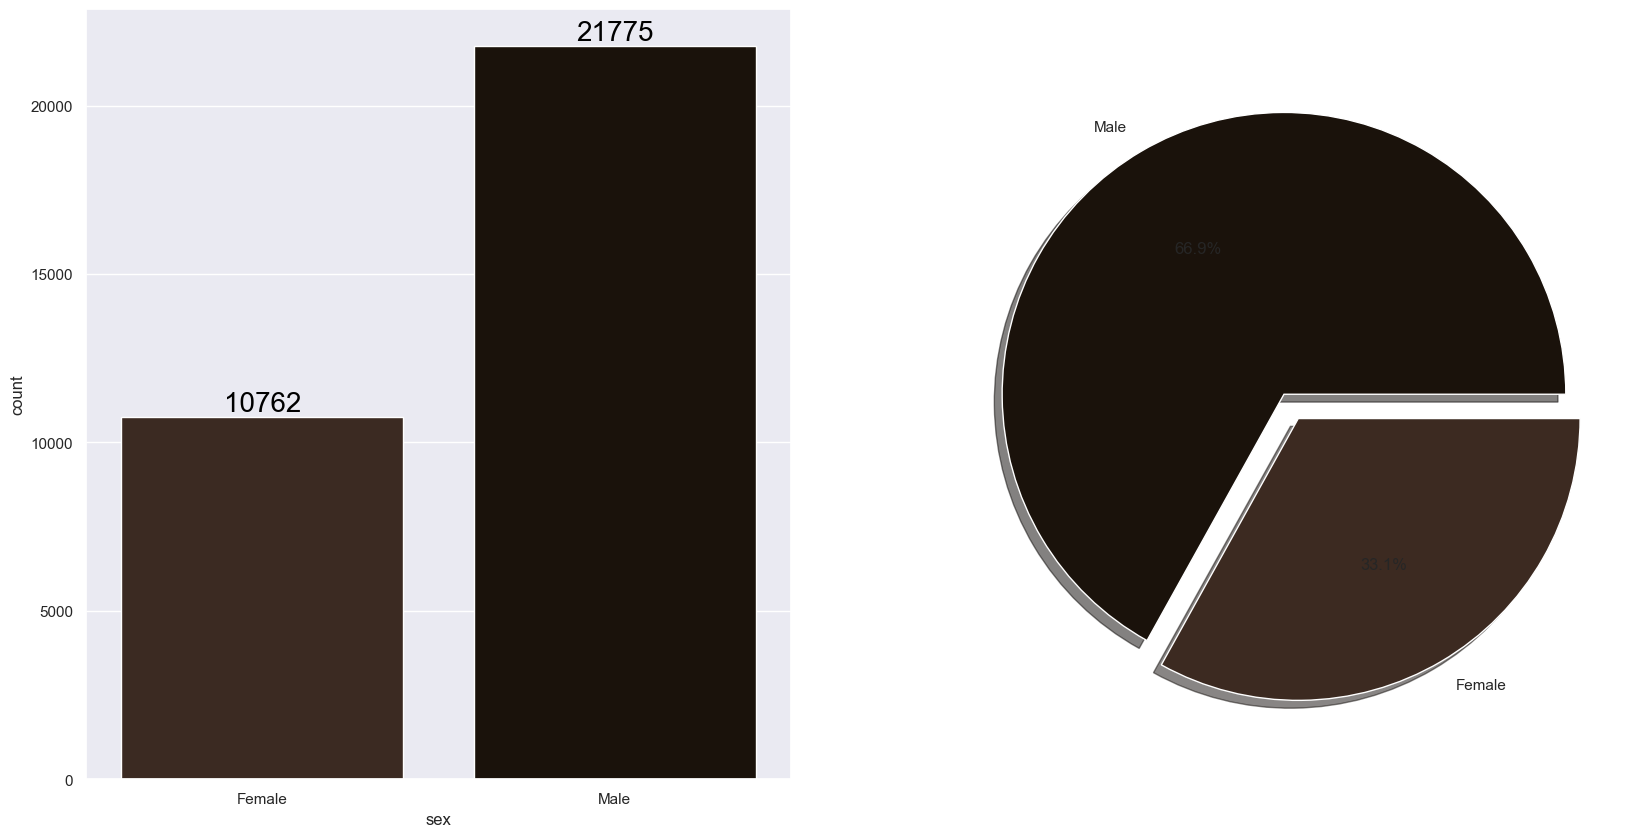

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

custom_palette = {'Male': '#1A120B', 'Female': '#3C2A21'}

sns.countplot(x='sex', data=df, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['sex'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], 
        autopct='%1.1f%%', shadow=True, colors=['#1A120B', '#3C2A21'])

plt.show()

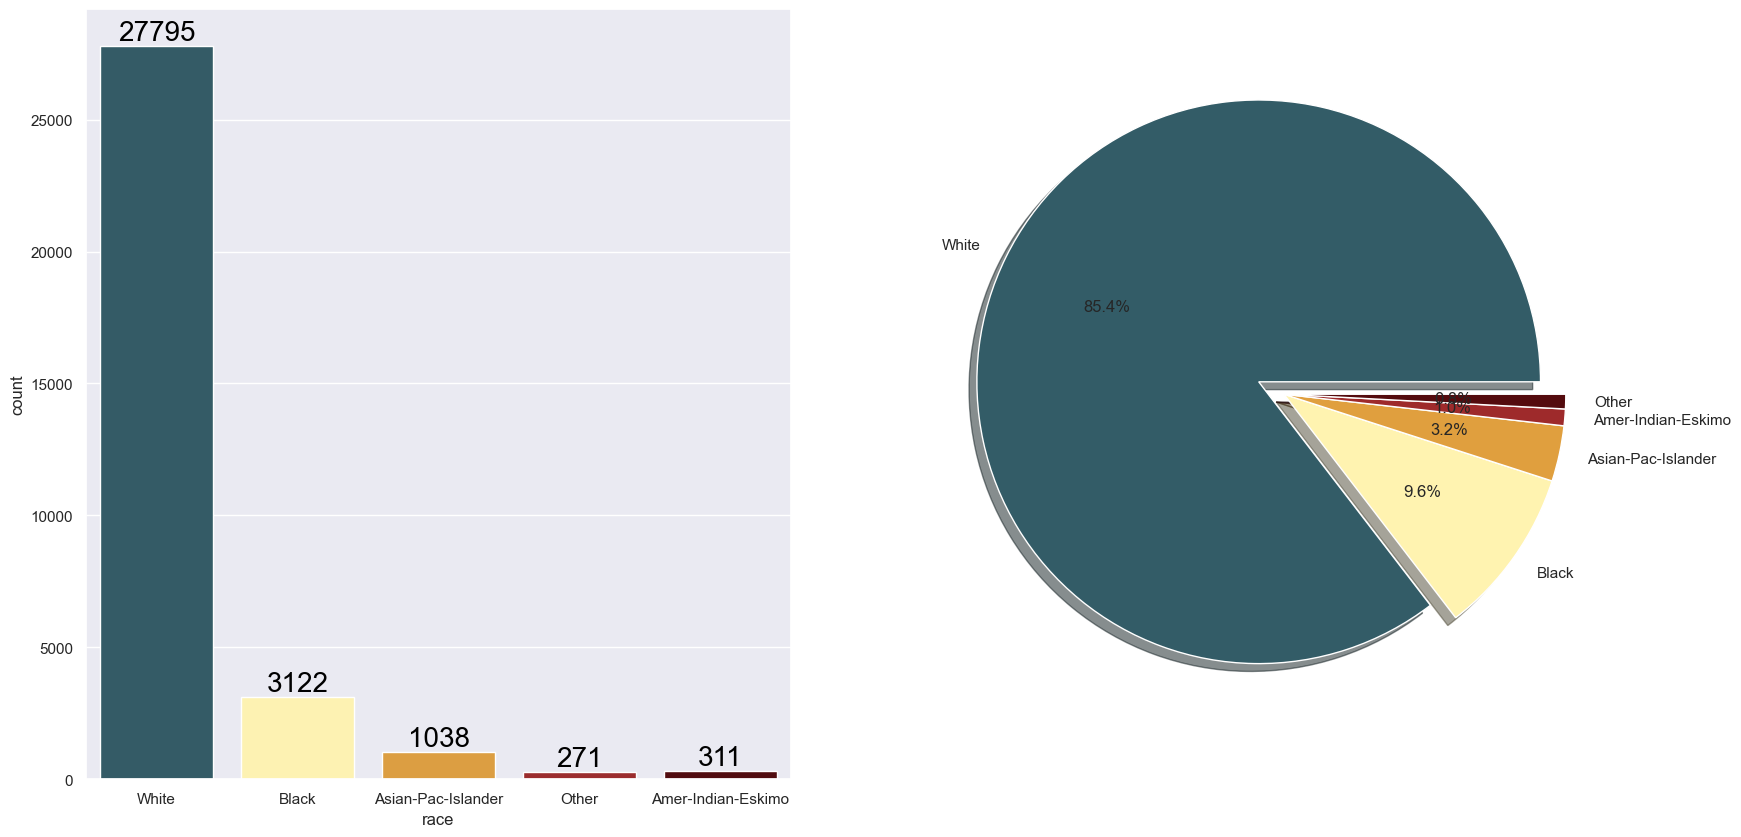

In [22]:
custom_palette = ['#335c67', '#fff3b0', '#e09f3e', '#9e2a2b', '#540b0e']

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race', data=df, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['race'].value_counts(), labels=df['race'].value_counts().index, explode=[0.1, 0, 0, 0, 0],
        autopct='%1.1f%%', shadow=True, colors=custom_palette)

plt.show()

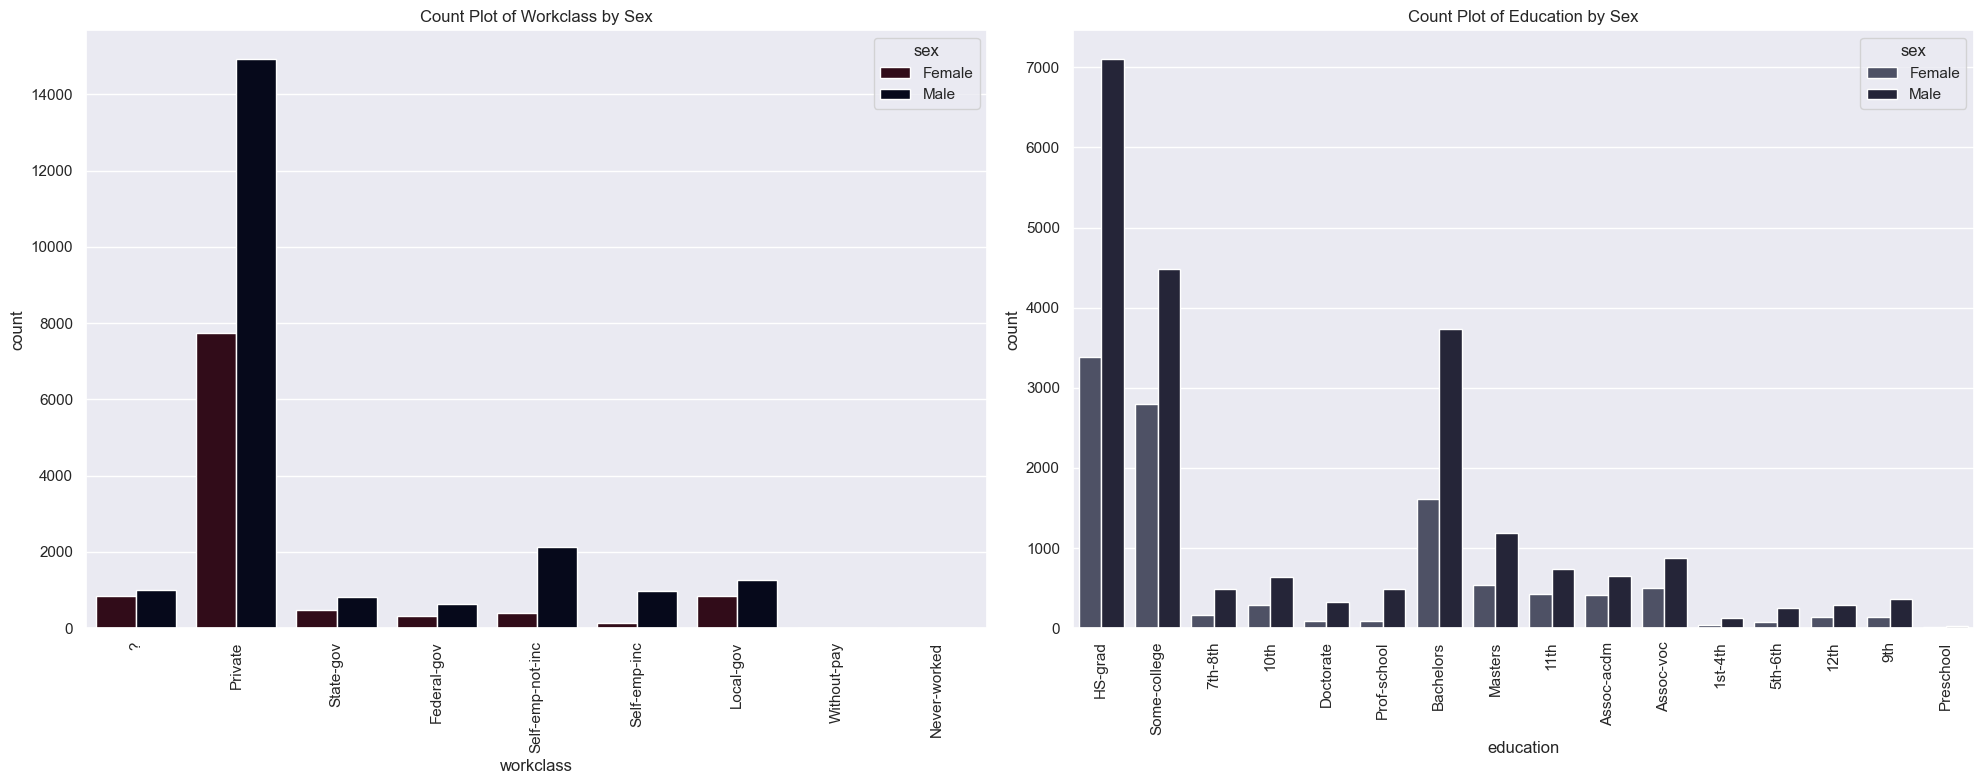

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
custom_palette = {'Male': '#03071e', 'Female': '#370617'}
custom_palette2 = {'Male': '#22223b', 'Female': '#4a4e69'}

plt.subplot(121)
sns.countplot(data=df, x='workclass', hue='sex', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Count Plot of Workclass by Sex')

plt.subplot(122)
sns.countplot(data=df, x='education', hue='sex', palette=custom_palette2)
plt.xticks(rotation=90)
plt.title('Count Plot of Education by Sex')

plt.tight_layout()
plt.show()

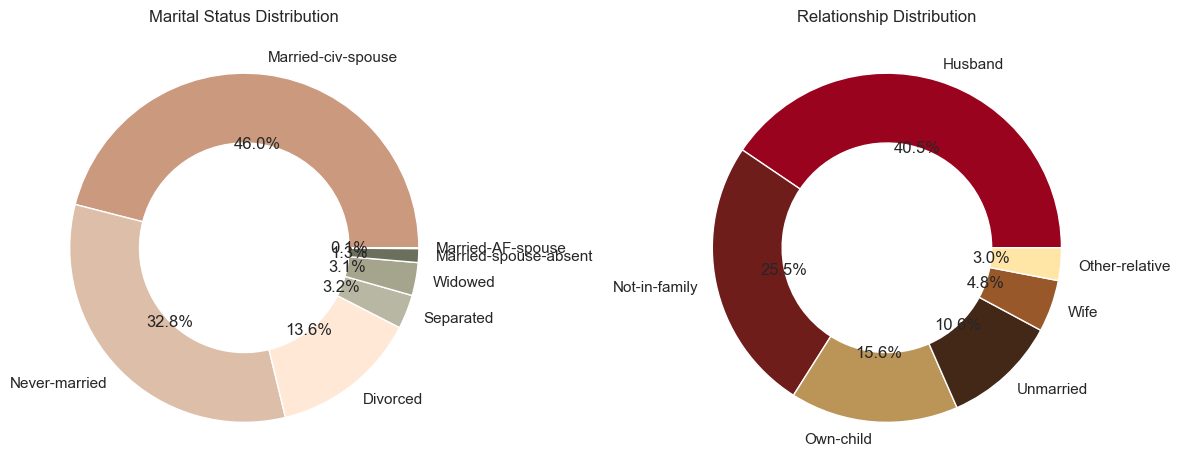

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ['#cb997e', '#ddbea9', '#ffe8d6', '#b7b7a4', '#a5a58d', '#6b705c']
custom_palette2 = ['#9a031e', '#6f1d1b', '#bb9457', '#432818', '#99582a', '#ffe6a7']

plt.subplot(121)
marital_status_counts = df['marital.status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', 
        colors=custom_palette[:len(marital_status_counts)], wedgeprops=dict(width=0.4))
plt.title('Marital Status Distribution')

# Second plot: pie chart for relationship distribution with custom colors
plt.subplot(122)
relationship_counts = df['relationship'].value_counts()
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', 
        colors=custom_palette2[:len(relationship_counts)], wedgeprops=dict(width=0.4))
plt.title('Relationship Distribution')

plt.tight_layout()
plt.show()

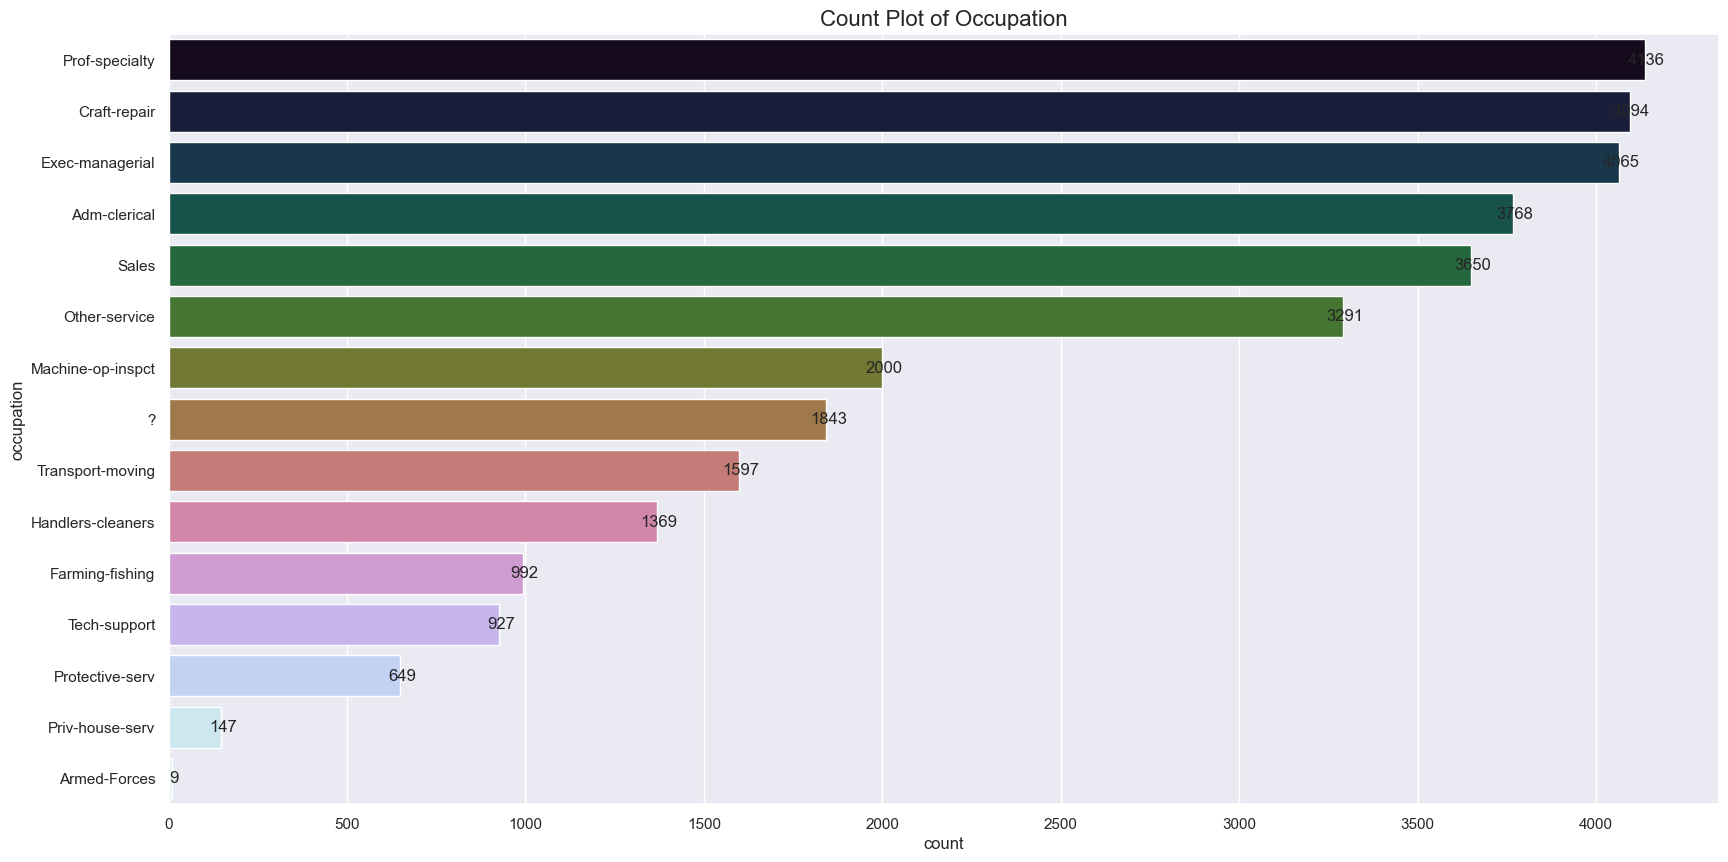

In [26]:
plt.figure(figsize=(20, 10))
occupation_counts = df['occupation'].value_counts().sort_values(ascending=False)
sns.countplot(y=df['occupation'], data=df, order=occupation_counts.index, palette='cubehelix', saturation=0.95)
plt.xticks(rotation=0)  # Rotating labels on y-axis
plt.title('Count Plot of Occupation', fontsize=16)

for i, count in enumerate(occupation_counts):
    plt.text(count + 5, i, str(count), ha='center', va='center', fontsize=12)

plt.show()

### Income Distribution

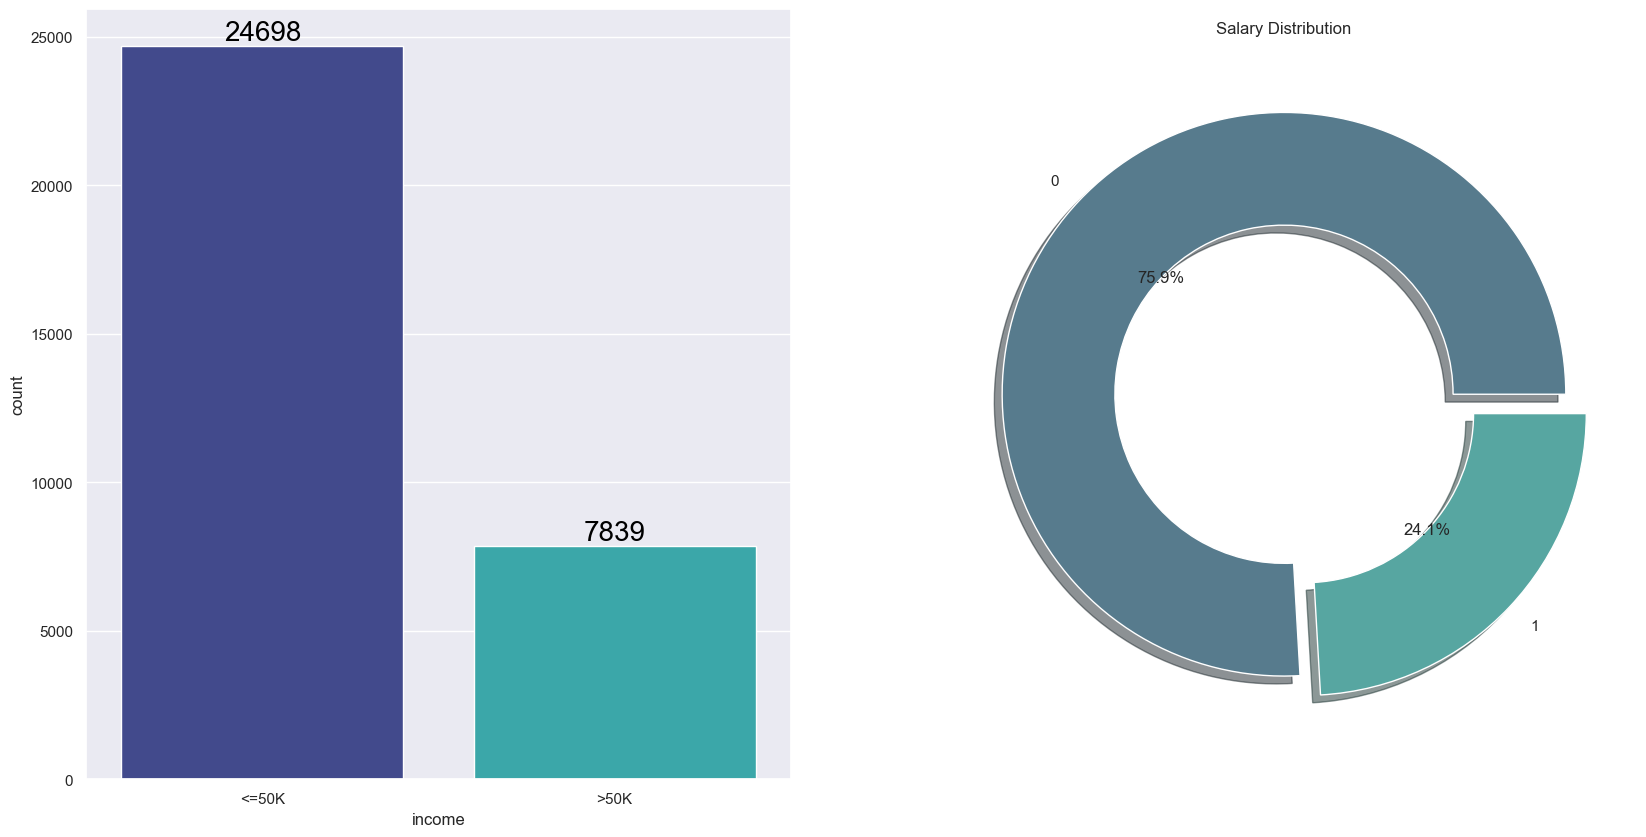

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df['income'], data=df, palette='mako', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Donut chart
ax[1].pie(x=df['income'].value_counts(), labels=[0, 1], explode=[0, 0.1], autopct='%1.1f%%', 
           shadow=True, colors=['#577B8D', '#57A6A1'], wedgeprops={'width': 0.4})
ax[1].set_aspect('equal') 
ax[1].set_title('Salary Distribution')

plt.show()

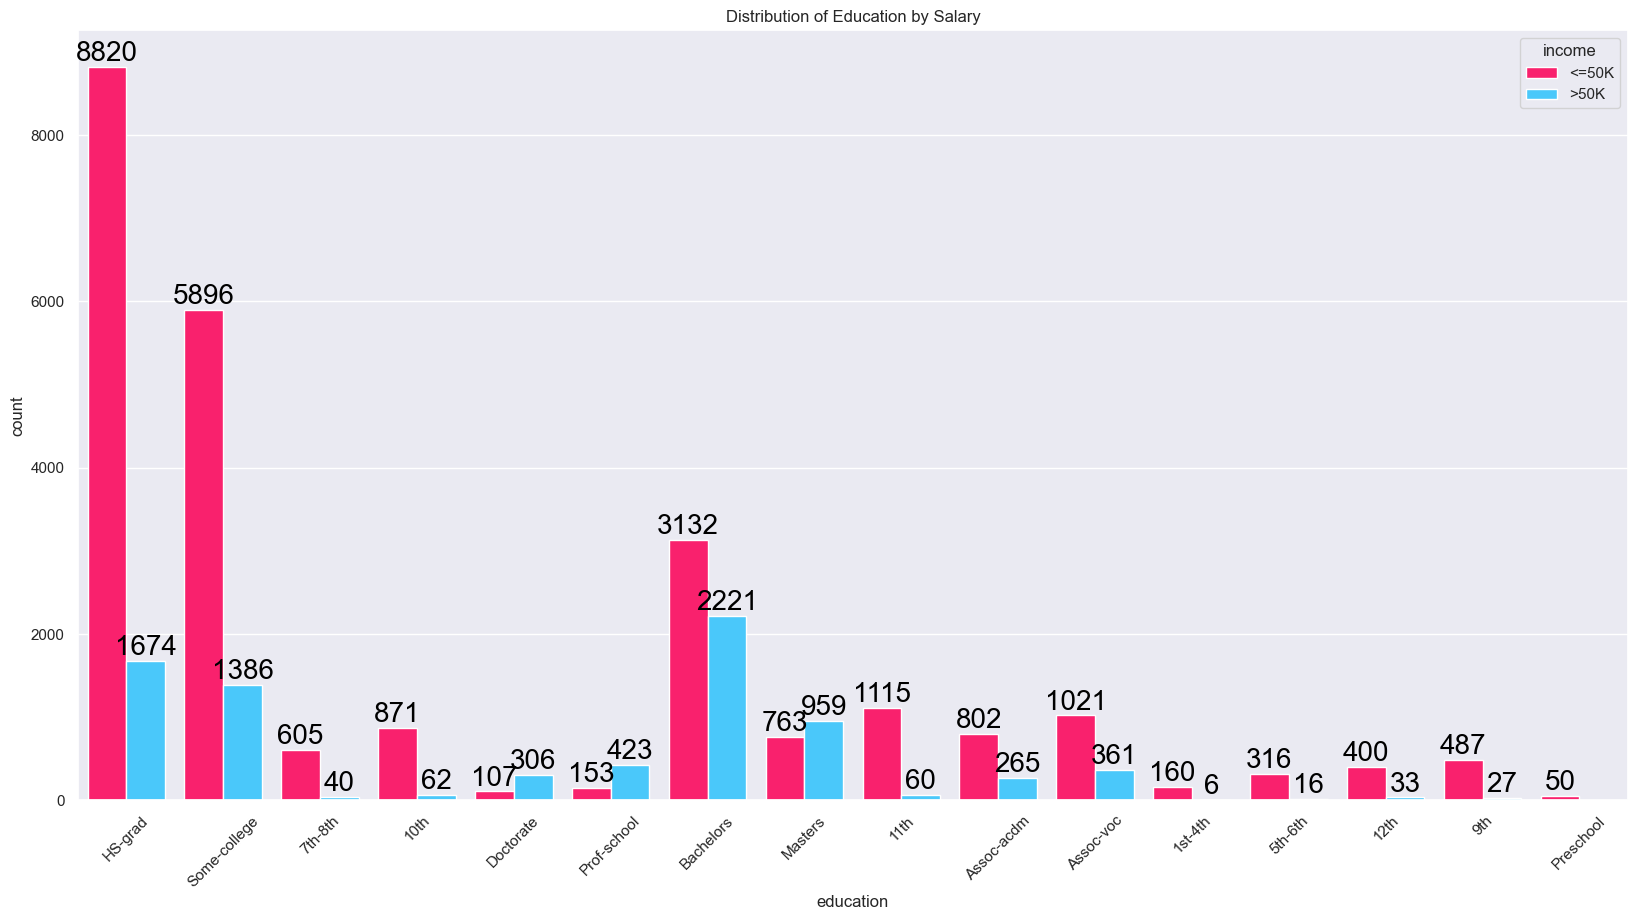

In [29]:
custom_palette = {"<=50K": '#ff1b6b', ">50K": '#45caff'}

plt.figure(figsize=(20, 10))
ax = plt.subplot()
sns.countplot(x='education', data=df, palette=custom_palette, hue='income', saturation=0.95, ax=ax)
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)

plt.title('Distribution of Education by Salary')
plt.xticks(rotation=45)
plt.show()

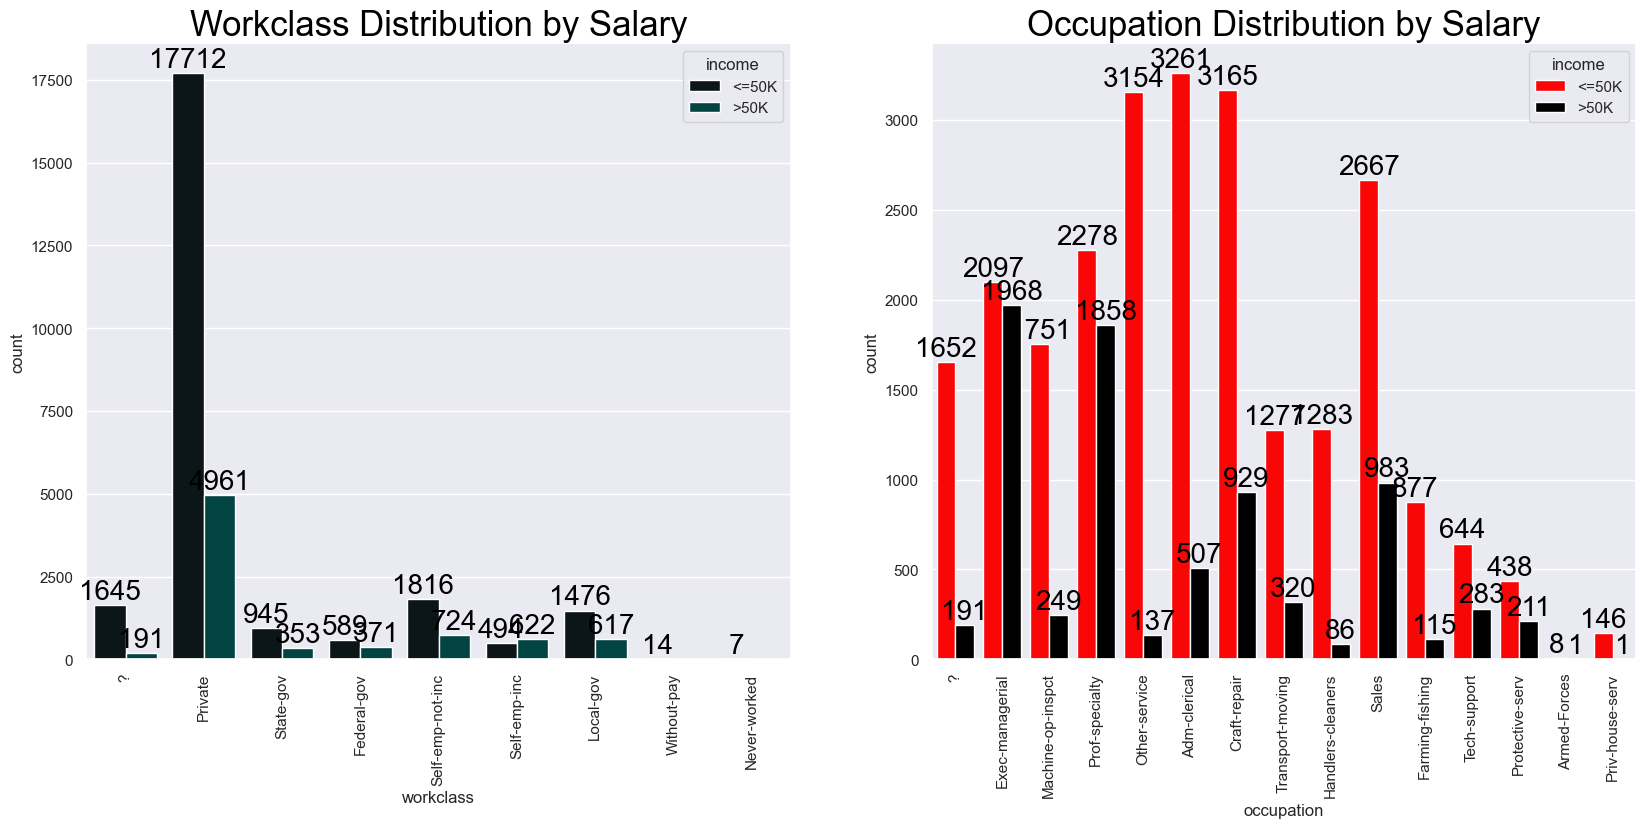

In [30]:
palette_workclass = {"<=50K": '#0c1618', ">50K": '#004643'}
palette_occupation = {"<=50K": '#ff0000', ">50K": '#000000'}

f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='workclass', data=df, palette=palette_workclass, hue='income', saturation=0.95, ax=ax[0])
ax[0].set_title('Workclass Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='x', labelrotation=90) 

sns.countplot(x='occupation', data=df, palette=palette_occupation, hue='income', saturation=0.95, ax=ax[1])
ax[1].set_title('Occupation Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='x', labelrotation=90)

plt.show()

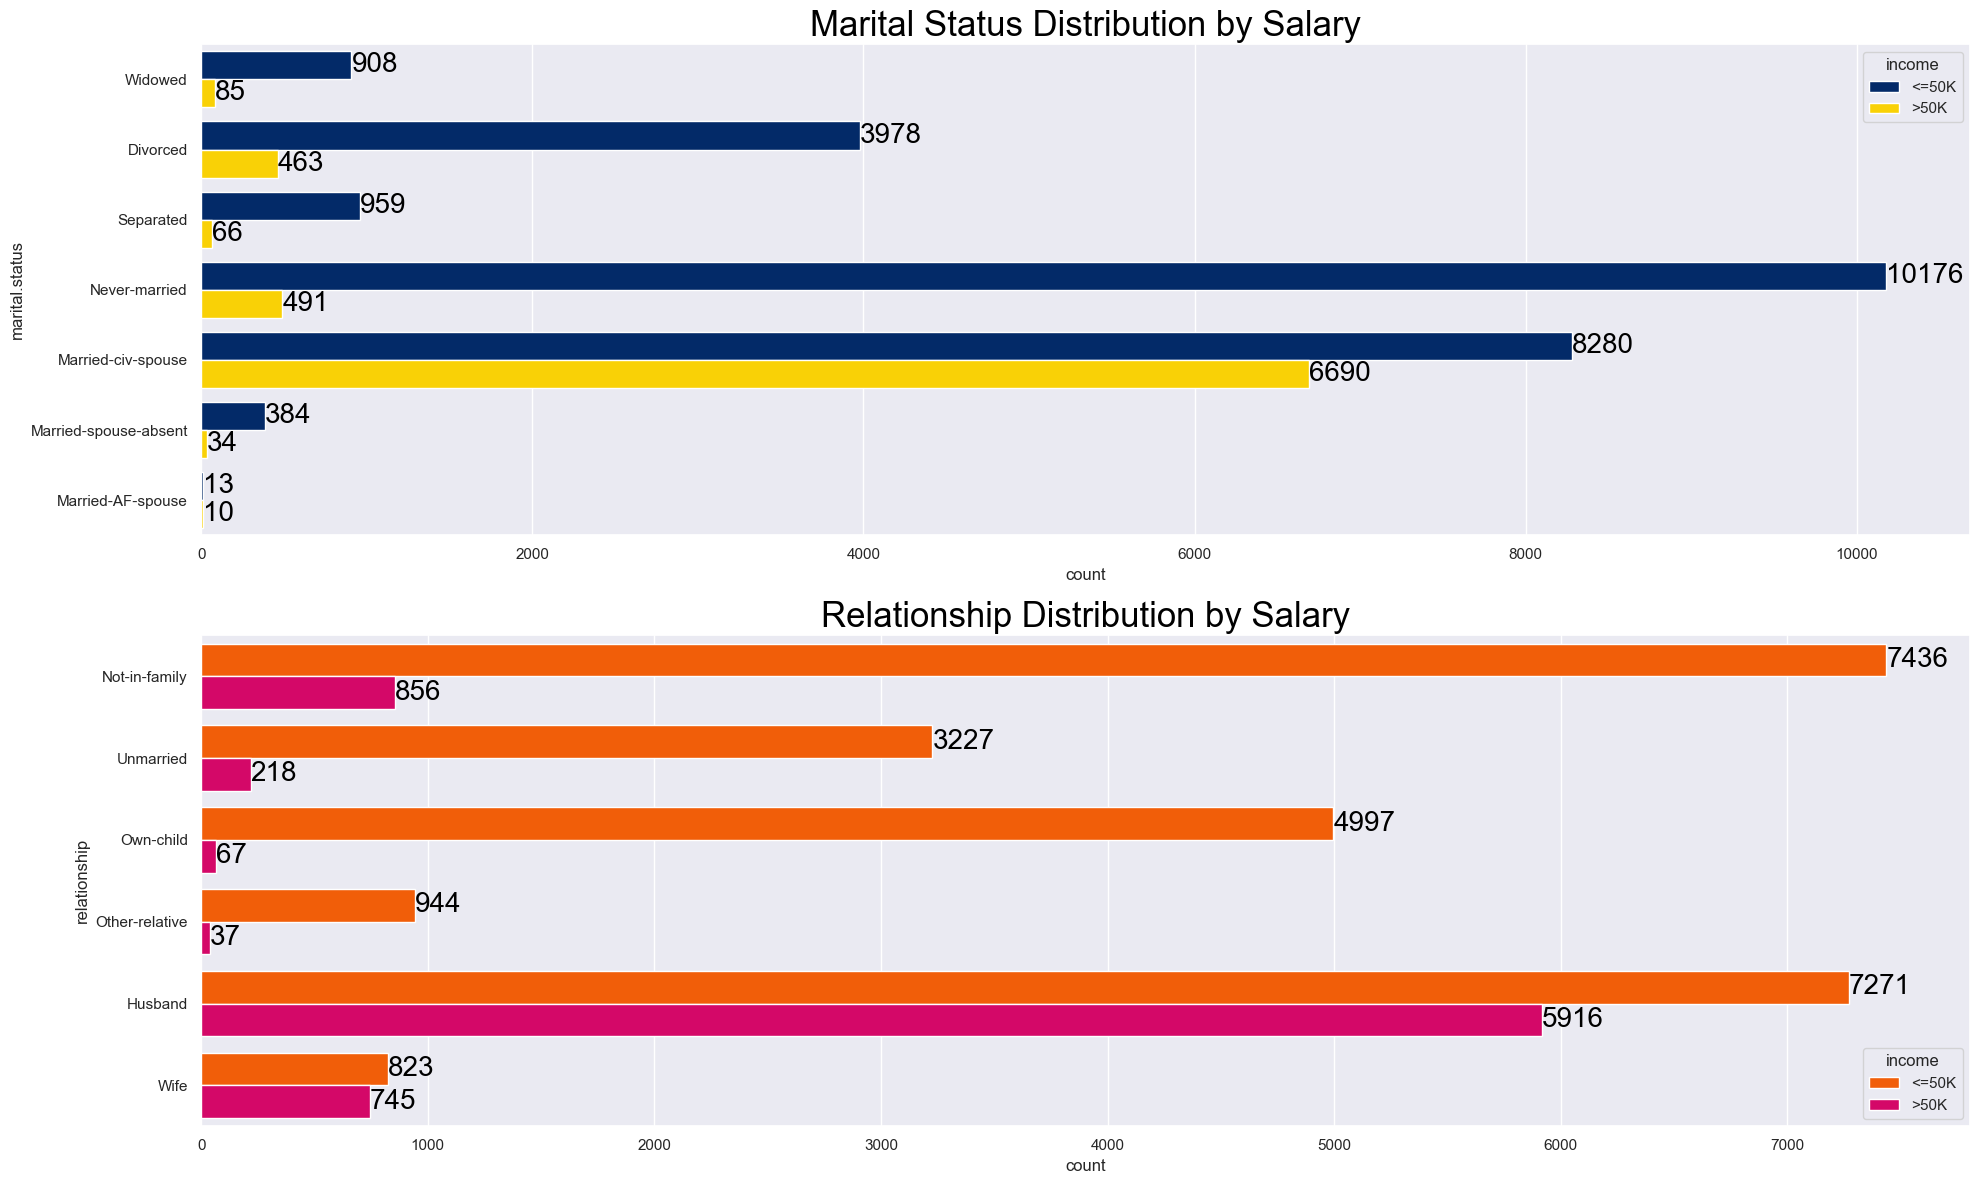

In [31]:
palette_workclass = {"<=50K": '#00296b', ">50K": '#ffd500'}
palette_occupation = {"<=50K": '#f75c03', ">50K": '#d90368'}

f, ax = plt.subplots(2, 1, figsize=(20, 12))
sns.countplot(y='marital.status', data=df, palette=palette_workclass, hue='income', saturation=0.95, ax=ax[0])
ax[0].set_title('Marital Status Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='y', labelrotation=0)  

sns.countplot(y='relationship', data=df, palette=palette_occupation, hue='income', saturation=0.95, ax=ax[1])
ax[1].set_title('Relationship Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='y', labelrotation=0)  

plt.tight_layout()
plt.show()

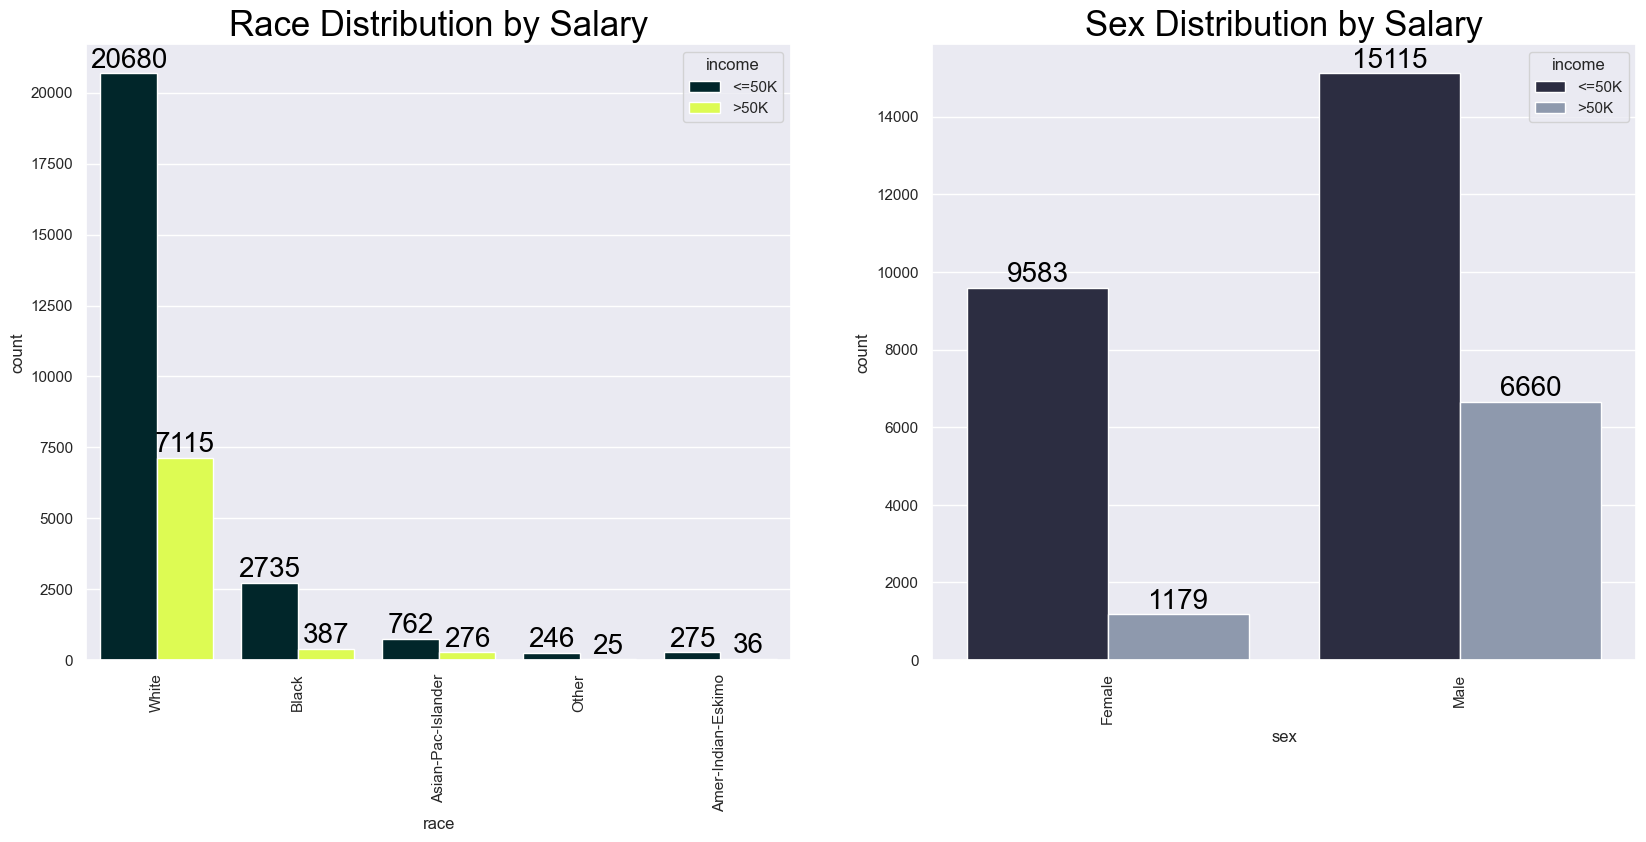

In [32]:
palette_workclass = {"<=50K": '#00272b', ">50K": '#e0ff4f'}
palette_occupation = {"<=50K": '#2b2d42', ">50K": '#8d99ae'}

f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='race', data=df, palette=palette_workclass, hue='income', saturation=0.95, ax=ax[0])
ax[0].set_title('Race Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='x', labelrotation=90) 

sns.countplot(x='sex', data=df, palette=palette_occupation, hue='income', saturation=0.95, ax=ax[1])
ax[1].set_title('Sex Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='x', labelrotation=90)

plt.show()

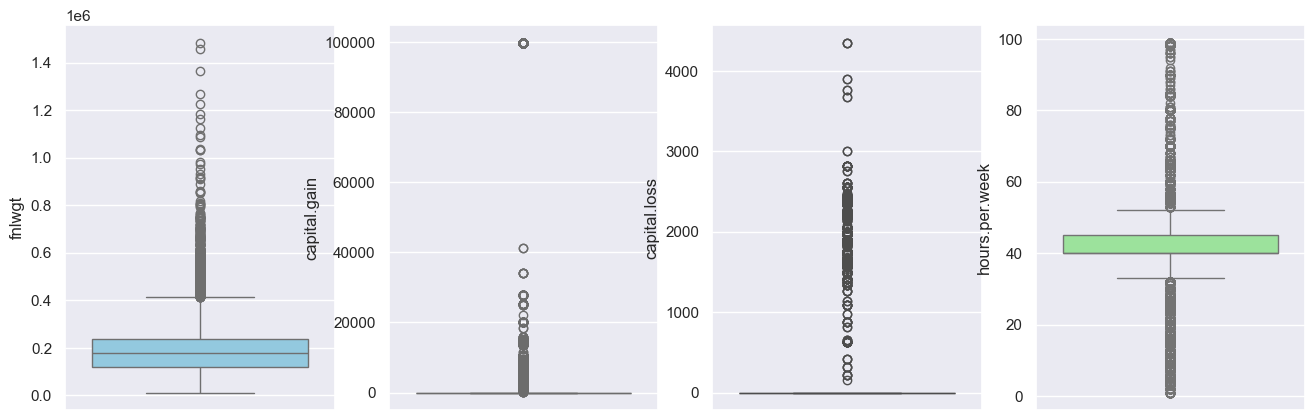

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['fnlwgt'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['capital.gain'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['capital.loss'],color='yellow')
plt.subplot(144)
sns.boxplot(df['hours.per.week'],color='lightgreen')
plt.show()

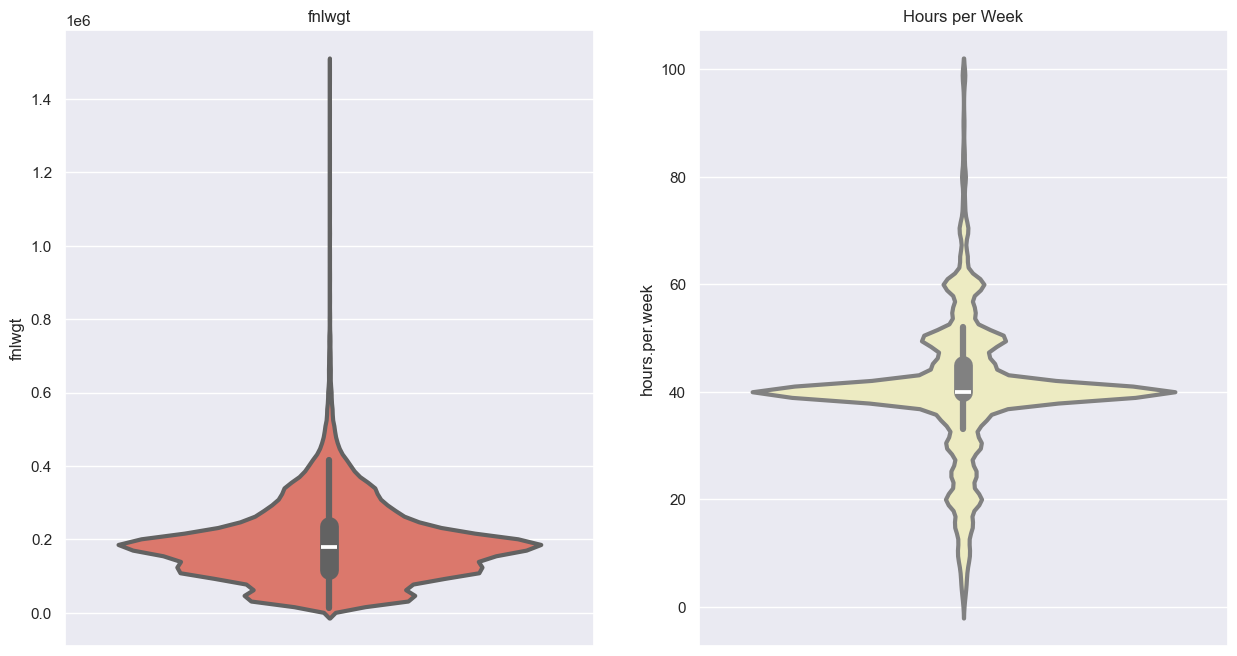

In [37]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('fnlwgt')
sns.violinplot(y='fnlwgt', data=df, color='#ed6a5a', linewidth=3)

plt.subplot(1, 2, 2)
plt.title('Hours per Week')
sns.violinplot(y='hours.per.week', data=df, color='#f4f1bb', linewidth=3)

plt.show()

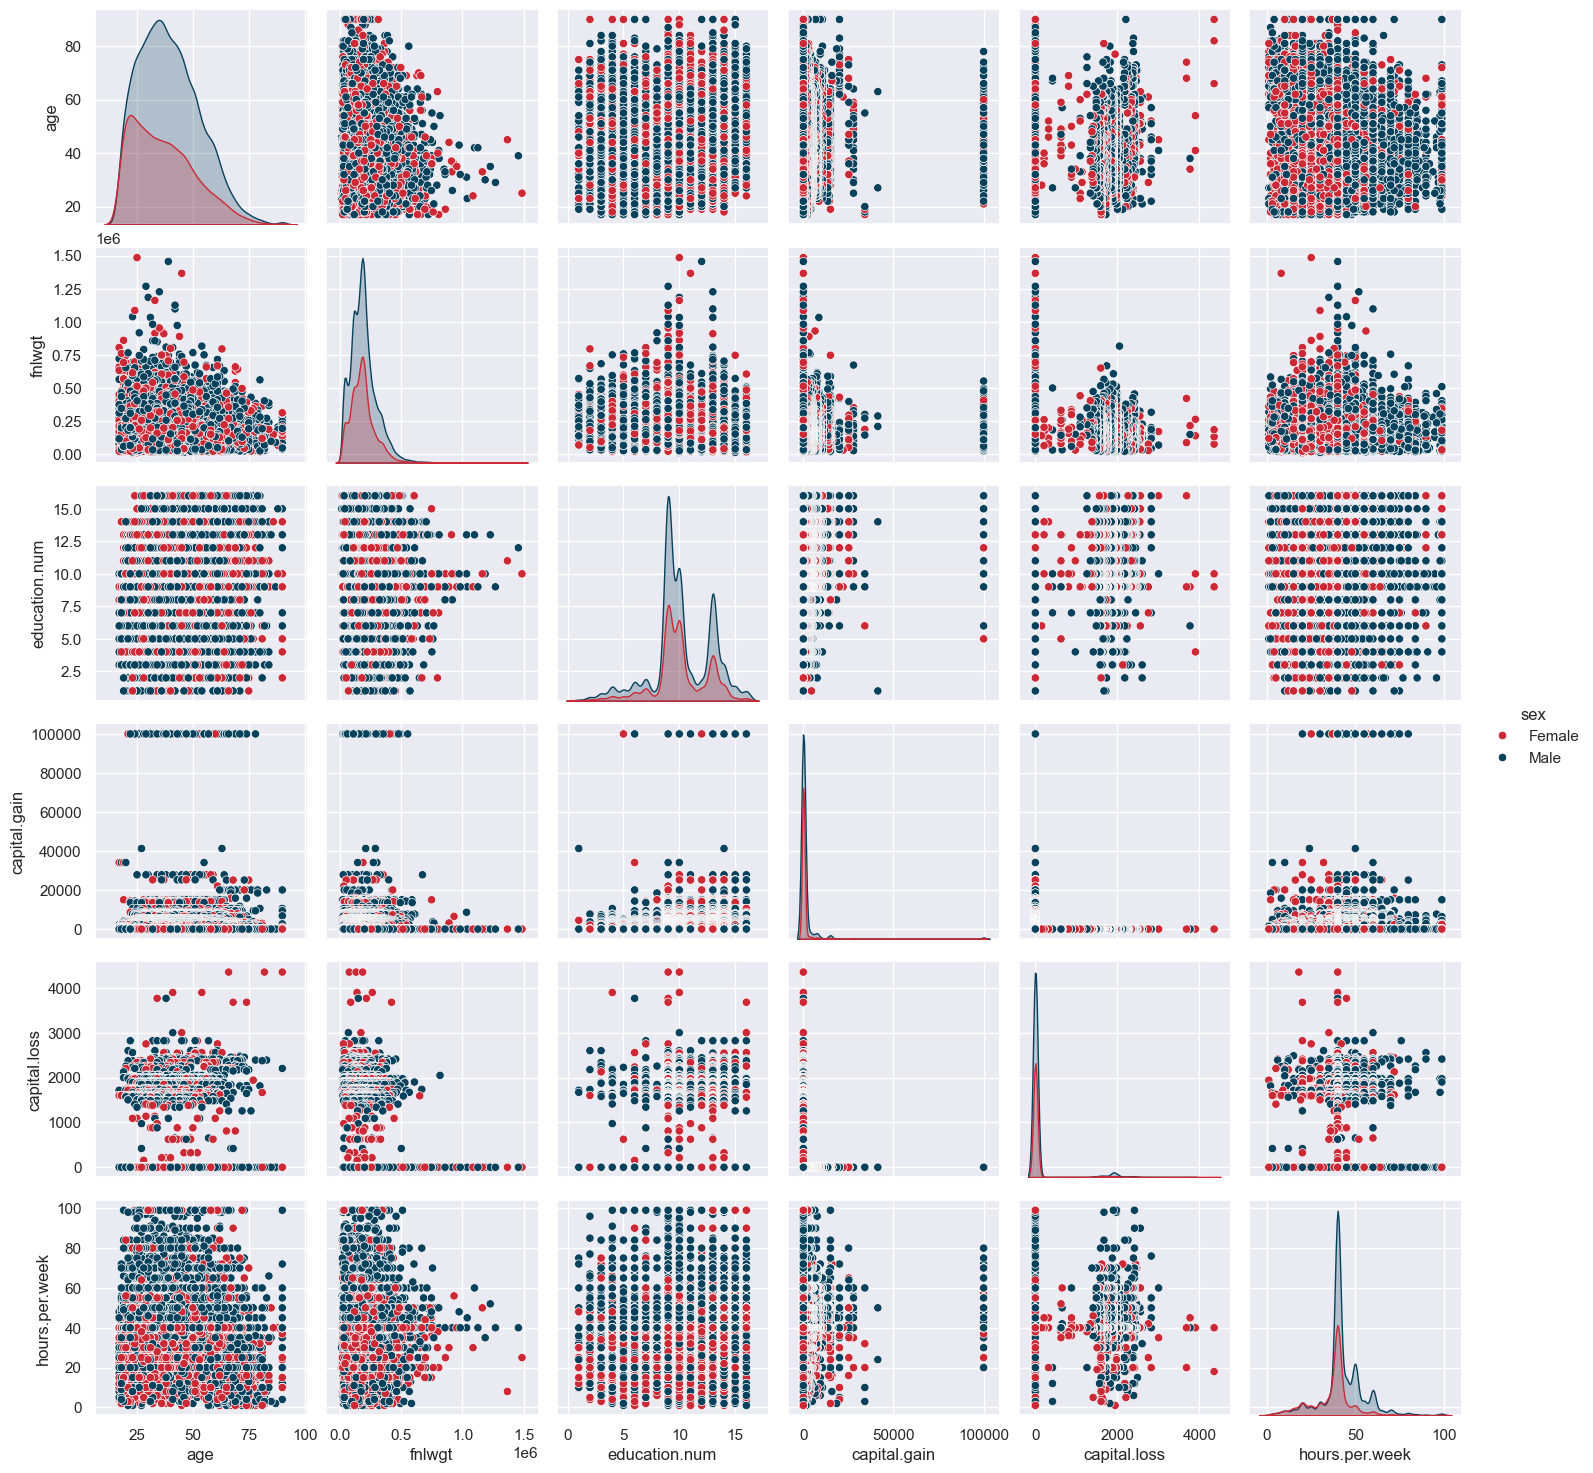

In [38]:
custom_palette = {'Male': '#08415c', 'Female': '#cc2936'}
sns.pairplot(df, hue='sex', palette=custom_palette)
plt.show()

# Feature Engineering

### Fixing '?' values in the dataset

In [40]:
df = df.replace('?', np.nan)

In [41]:
# Checking null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [42]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [44]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Label Encoding

In [45]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### Feature Selection

In [46]:
X = df.drop('income', axis=1)
y = df['income']

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [48]:
selector.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [49]:
feature_imp = selector.feature_importances_

In [50]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.51
1 4.08
2 16.74
3 3.86
4 8.62
5 8.17
6 7.29
7 8.48
8 1.48
9 2.9
10 8.9
11 2.86
12 9.58
13 1.52


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int32
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int32
 4   education.num   32537 non-null  int64
 5   marital.status  32537 non-null  int32
 6   occupation      32537 non-null  int32
 7   relationship    32537 non-null  int32
 8   race            32537 non-null  int32
 9   sex             32537 non-null  int32
 10  capital.gain    32537 non-null  int64
 11  capital.loss    32537 non-null  int64
 12  hours.per.week  32537 non-null  int64
 13  native.country  32537 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.7 MB


In [52]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### Fixing imbalanced dataset using Oversampling

In [54]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    75.91 %
1    24.09 %
Name: proportion, dtype: object

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [56]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [57]:
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [58]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

### Creating a train test split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [60]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39516, 8)
X_test shape: (9880, 8)
Y_train shape: (39516,)
Y_test shape: (9880,)


# Model Building

## Classification Models

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [62]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [63]:
Y_pred_log_reg = log_reg.predict(X_test)

### KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [66]:
Y_pred_knn = knn.predict(X_test)

### Support Vector Classifier

In [67]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [68]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [69]:
Y_pred_svc = svc.predict(X_test)

### Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [71]:
nb.fit(X_train, Y_train)

GaussianNB()

In [72]:
Y_pred_nb = nb.predict(X_test)

### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [74]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [77]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [78]:
Y_pred_ran_for = ran_for.predict(X_test)

### Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(random_state=42)

In [80]:
grad_boost.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
Y_pred_grad_boost = grad_boost.predict(X_test)

### LightGBM Classifier

In [82]:
import lightgbm as lgb
light_gbm = lgb.LGBMClassifier(random_state=42)

In [83]:
light_gbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 19792, number of negative: 19724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 39516, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500860 -> initscore=0.003442
[LightGBM] [Info] Start training from score 0.003442


LGBMClassifier(random_state=42)

In [84]:
Y_pred_light_gbm = light_gbm.predict(X_test)

# Model Evaluation

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [86]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.68
F1 score: 75.55


In [87]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.71
F1 score: 84.65


In [88]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.97
F1 score: 82.91


In [89]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 65.44
F1 score: 49.82


In [90]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.05
F1 score: 91.52


In [91]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.72
F1 score: 93.02


In [92]:
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_grad_boost) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_grad_boost) * 100, 2))

Gradient Boosting Classifier:
Accuracy score: 83.6
F1 score: 84.07


In [93]:
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_grad_boost) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_grad_boost) * 100, 2))

Gradient Boosting Classifier:
Accuracy score: 83.6
F1 score: 84.07


In [94]:
print('LightGBM Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_light_gbm) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_light_gbm) * 100, 2))

LightGBM Classifier:
Accuracy score: 85.06
F1 score: 85.58


# Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [97]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [98]:
rf_tuned = RandomForestClassifier(random_state=42)

In [99]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [100]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [101]:
rf_cv.best_score_

0.9133264490858544

In [102]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [103]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [104]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [105]:
Y_pred_rf_best = rf_best.predict(X_test)

In [106]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.67
F1 score: 92.98


In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

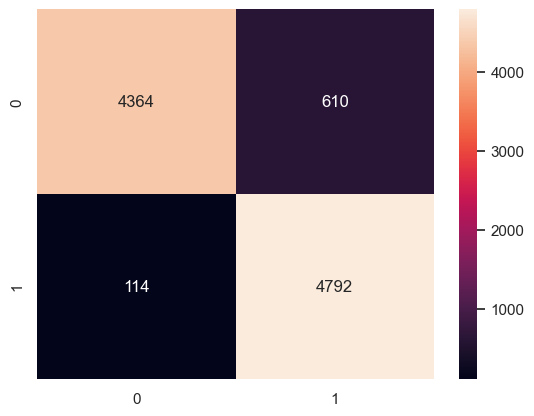

In [108]:
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.show()

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4974
           1       0.89      0.98      0.93      4906

    accuracy                           0.93      9880
   macro avg       0.93      0.93      0.93      9880
weighted avg       0.93      0.93      0.93      9880



**Final Verdict**: After evaluating all the models, the Random Forest classifier emerged as the top performer, achieving an impressive accuracy of 92.67% and an F1-Score of 92.98%.